# Escuela JOSE MARIA VE


In [1]:
import random
import simpy
import random
import collections
import matplotlib.pyplot as pp

print("TOTAL DE ESTUDIANTES: 712")
print("HOMBRES: 326")
print("MUJERES: 386")
print("PROFESORES: 42")


TOTAL DE ESTUDIANTES: 712
HOMBRES: 326
MUJERES: 386
PROFESORES: 42


In [2]:
#profesores vacunados y no
profes = 42
profe_vacuna = int(profes*0.9)
profes_vacunados = profes - profe_vacuna
print("Profesores: ",profes)
print("Profesores vacunados: ",profe_vacuna)
print("Profesores no vacunados:",profes_vacunados)
#promedio de estudiantes que asisten a las clases 

ESTUDIANTES = 712
print("Estudiantes: ",ESTUDIANTES)
totEst = random.randint(5,10)
print("ESTUDIANTES QUE NO ASISTEN: ",totEst,"%")
est_noAsisten = int(ESTUDIANTES * totEst /100)
print("# ESTUDIANTES QUE NO ASISTEN: ",est_noAsisten)
est_asisten = ESTUDIANTES-est_noAsisten
print("ESTUDIANTES QUE ASISTEN: ",est_asisten)

#total de estudiantes y profesores presentes
TOTAL = profe_vacuna + est_asisten

TOTAL_CONTAGIADOS = 0

print("total: ",TOTAL)

cursos = ['curso 1','curso 2','curso 3','curso 4']
aula1 = {}
aula2 = {}
aula3 = {}
aula4 = {}


print("Cursos: ",cursos)

#Para el numero de contagiados al final del 
contagiados = []

Profesores:  42
Profesores vacunados:  37
Profesores no vacunados: 5
Estudiantes:  712
ESTUDIANTES QUE NO ASISTEN:  6 %
# ESTUDIANTES QUE NO ASISTEN:  42
ESTUDIANTES QUE ASISTEN:  670
total:  707
Cursos:  ['curso 1', 'curso 2', 'curso 3', 'curso 4']


In [3]:
def ingreso_aula(env,estudiante,aula,curso):

    print(aula)
    print("Hora",env.now)
    
    
    if aula=="Curso 1":
        aula1[estudiante]=estudiante
        yield env.timeout(0.01)
        return
    if aula=="Curso 2":
        aula2[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 3":
        aula3[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    if aula=="Curso 4":
        aula4[estudiante]=estudiante
        yield env.timeout(0.01)
        return 
    
        
def clases(env, curso):
    print("Clases")
    c = 0
    while True:
        yield env.timeout(random.expovariate(1/0.05))
        print("time ",env.now)
        aula = random.choice(curso.cursos)
        print("Aula que esta el estudiante. ",aula)
        print("hora : ",env.now)
        estudiante = curso.estudiantes[c]
        print(estudiante)
        tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)
        if tot < curso.n_estudiantes:
            yield env.process(ingreso_aula(env, estudiante,aula,curso))
        else:
            print("no hay mas estudiantes")
            print("Tiempo ",env.now)
            break
        c+=1

In [4]:
Curso = collections.namedtuple('Curso','contador,cursos,capacidad,usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes')
print("Institucion educativa")

env = simpy.Environment()

contador = simpy.Resource(env, capacity=6)
cursos = ["Curso 1","Curso 2","Curso 3","Curso 4"]
capacidad = {curso: int(((est_asisten)/len(cursos))+6) for curso in cursos}
usado = {curso:env.event() for curso in cursos}

t_curso_lleno = {curso: None for curso in cursos}


puesto_usado = {curso: 0 for curso in cursos}

estudiantes =[0] * est_asisten
for j in range(est_asisten):
    estudiantes[j] = "Estudiante "+str(j)

n_estudiantes = est_asisten
    
print("cursos: ",cursos[1])

curs = Curso(contador, cursos, capacidad, usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes)
env.process(clases(env,curs))
env.run(until=80)

Institucion educativa
cursos:  Curso 2
Clases
time  0.007578793332244806
Aula que esta el estudiante.  Curso 2
hora :  0.007578793332244806
Estudiante 0
Curso 2
Hora 0.007578793332244806
time  0.07736145531968781
Aula que esta el estudiante.  Curso 1
hora :  0.07736145531968781
Estudiante 1
Curso 1
Hora 0.07736145531968781
time  0.12139858699519716
Aula que esta el estudiante.  Curso 4
hora :  0.12139858699519716
Estudiante 2
Curso 4
Hora 0.12139858699519716
time  0.1419075953736126
Aula que esta el estudiante.  Curso 1
hora :  0.1419075953736126
Estudiante 3
Curso 1
Hora 0.1419075953736126
time  0.18752533804375085
Aula que esta el estudiante.  Curso 2
hora :  0.18752533804375085
Estudiante 4
Curso 2
Hora 0.18752533804375085
time  0.22230475220960555
Aula que esta el estudiante.  Curso 1
hora :  0.22230475220960555
Estudiante 5
Curso 1
Hora 0.22230475220960555
time  0.2417654863891563
Aula que esta el estudiante.  Curso 4
hora :  0.2417654863891563
Estudiante 6
Curso 4
Hora 0.24176548

IndexError: list index out of range

# TOTAL DE ESTUDIANTES QUE ASISTEN PARA LAS PRUEBAS

In [5]:
tot = len(aula1)+len(aula2)+len(aula3)+len(aula4)

aulas_x = ["aula 1","aula 2","aula 3","aula 4"]
aulas_y = [len(aula1), len(aula2), len(aula3), len(aula4)]

print(" Aula 1",len(aula1), "\n","Aula 2",len(aula2),"\n","Aula 3",len(aula3),"\n","Aula 4",len(aula4))
print("TOTAL ",tot)

 Aula 1 176 
 Aula 2 154 
 Aula 3 158 
 Aula 4 182
TOTAL  670


# total de contagios y pruebas por hacer

In [7]:
por_pcr = int(tot*0.10)
print("# DE ESTUDIANTES POR HACER LA PRUEBA: ",por_pcr," de ",tot)
por_pcr = int(len(aula4)*0.02)

print("ESTUDIANTES QUE DIERON POSITIVO: ",por_pcr," de ",len(aula4))
TOTAL_CONTAGIADOS=TOTAL_CONTAGIADOS+por_pcr
print("TOTAL CONTAGIADOS: ",TOTAL_CONTAGIADOS)

# DE ESTUDIANTES POR HACER LA PRUEBA:  67  de  670
ESTUDIANTES QUE DIERON POSITIVO:  3  de  182
TOTAL CONTAGIADOS:  3


# GRAFICA DE ESTUDIANTES ASISTIDOS X AULA

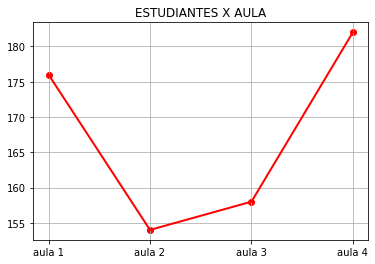

In [8]:

x = aulas_x
y = aulas_y
pp.plot(x,y, linewidth=2,color='red')
pp.scatter(x,y,color='red')
pp.title("ESTUDIANTES X AULA")
pp.grid(True)
pp.show()

In [9]:


def inicio_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio clases: ",env.now)
        yield env.timeout(3.5)
        return
    print("Fin primera jornada: ",env.now)
    return 
    
def receso(env,n_est,resource,espera,prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        print("Inicio de receso: ",env.now)
        yield req
        print("est",n_est)
        contg = int(n_est * 0.02)
        contg = contg
        print("CONTAGIO DEL 2% ENreces. ",contg)
        yield env.timeout(0.5) 
        return
    print("Fin receso: ",env.now)
    return
    
def fin_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio segunda-jornada: ",env.now)
        yield env.timeout(2)
        return
    print("Fin segunda-jornada: ",env.now)
    return

# EJECUTAR EL SIMULADOR

In [10]:

env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)

t_est = len(aula1)+len(aula2)+len(aula3)

jornada1 = env.process(inicio_clases(env,res, espera=0,prio=0))
receso = env.process(receso(env,t_est,res, espera=3.5,prio=1))
jornada2 = env.process(fin_clases(env,res, espera=2,prio=2))

env.run()

Inicio clases:  0
Inicio de receso:  3.5
est 488
CONTAGIO DEL 2% ENreces.  9
Inicio segunda-jornada:  4.0


# DATOS DE CONTAGIOS

In [11]:
contg = int(t_est*0.02)
t=contg+TOTAL_CONTAGIADOS
print("# ESTUDIANTES AULA 4: ",len(aula4))
print("POSTIVOS POR PCR: ",TOTAL_CONTAGIADOS)
print("CONTAGIOS EN EL RECESO: ",contg)
print("TOTAL DE CONTAGIOS: ",t)

# ESTUDIANTES AULA 4:  182
POSTIVOS POR PCR:  3
CONTAGIOS EN EL RECESO:  9
TOTAL DE CONTAGIOS:  12
